# 환경 준비

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import glob

# 그래프 기본 설정
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(style='whitegrid', font='Malgun Gothic')


C:\Users\njh26\AppData\Local\Temp\ipykernel_7996\1020124191.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# 데이터 불러오기
path = r'C:\Users\njh26\Desktop\EDA_seoul_cycle'
files = glob.glob(path + '/서울특별시 공공자전거 이용정보(월별)_2021/*.csv')

df_list = []

for filepath in files:
    # print(filepath)
    # C:\Users\njh26\Desktop\EDA_seoul_cycle/서울특별시 공공자전거 이용정보(월별)_2021\서울특별시 공공자전거 이용정보(월별)_21.01.csv
    df_one_file = pd.read_csv(filepath, encoding = 'cp949')
    
    if filepath.split('.')[1] == '09' :  # 9월 파일의 컬럼명 오타로 인해 수정 코드 추가
        df_one_file = pd.read_csv(filepath, encoding = 'cp949')
        df_one_file = df_one_file.rename(columns={'이용거리(M)' : '이동거리(M)', '이용시간(본)' : '이용시간(분)'})

    df_list.append(df_one_file)

# 데이터 병합
df = pd.concat(df_list, axis = 0, ignore_index=True)

# 데이터 구조 파악

In [3]:
print(df.shape)
print(df.head())

(1323515, 11)
      대여일자  대여소번호      대여소명  대여구분코드  성별    연령대코드  이용건수     운동량   탄소량  \
0  2021-01      3      중랑센터  일일(회원)   M  AGE_003     2   47.68  0.40   
1  2021-01      3      중랑센터      정기   M  AGE_003    11  578.98  2.87   
2  2021-01      3      중랑센터      정기   M  AGE_004     1   81.65  0.53   
3  2021-01      5  상암센터 정비실  일일(회원)  \N  AGE_004     1  511.95  3.53   
4  2021-01      5  상암센터 정비실  일일(회원)   M  AGE_004     6  371.10  3.39   

    이동거리(M)  이용시간(분)  
0   1720.00       25  
1  12390.48      166  
2   2291.05       13  
3  15209.58       47  
4  14642.60      134  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323515 entries, 0 to 1323514
Data columns (total 11 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   대여일자     1323515 non-null  object 
 1   대여소번호    1323515 non-null  int64  
 2   대여소명     1323515 non-null  object 
 3   대여구분코드   1323515 non-null  object 
 4   성별       1151062 non-null  object 
 5   연령대코드    1323515 non-null  object 
 6   이용건수     1323515 non-null  int64  
 7   운동량      1323515 non-null  object 
 8   탄소량      1323515 non-null  object 
 9   이동거리(M)  1323515 non-null  float64
 10  이용시간(분)  1323515 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 111.1+ MB
None


In [5]:
print(df.isnull().sum())
# print(172453/1323515) 
# 성별 null값 확인함, 총 데이터의 13% 가량

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         172453
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리(M)         0
이용시간(분)         0
dtype: int64


# 데이터 전처리

In [6]:
# BIL_021은 10분이용권임을 문의사항 내역에서 확인함
df['대여구분코드'] = df['대여구분코드'].replace({'BIL_021' : '10분이용권'})
print(df['대여구분코드'].value_counts())

대여구분코드
정기         677801
일일(회원)     509009
단체          91411
일일(비회원)     38247
10분이용권       7047
Name: count, dtype: int64


In [7]:
print(df['연령대코드'].value_counts())

연령대코드
AGE_002    248744
AGE_003    220709
AGE_004    211255
AGE_008    180782
AGE_001    171181
AGE_005    165247
AGE_006     94249
AGE_007     31348
Name: count, dtype: int64


### 결측치 처리

In [8]:
# 엑셀 파일 내에서 성별, 운동량, 탄소량에서 \N으로 기입된 값 확인 -> 결측치 처리
df = df.replace({r'\N':np.NaN})

In [9]:
# 성별 m, f 대문자로 변경
df['성별'] = df['성별'].str.upper()
print(df[['성별']].value_counts())

성별
M     389811
F     353464
Name: count, dtype: int64


In [10]:
print(df.isnull().sum())
# print(580240/1323515)  # 성별 결측치 43% -> 결측처리 하지 않고 진행
# print(1899/1323515)   # 운동량, 탄소량 결측치 0.1% -> 결측처리 하고 진행

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         580240
연령대코드           0
이용건수            0
운동량          1899
탄소량          1899
이동거리(M)         0
이용시간(분)         0
dtype: int64


In [11]:
df = df.dropna(subset = ['운동량'])
print(df.isnull().sum())

대여일자            0
대여소번호           0
대여소명            0
대여구분코드          0
성별         579276
연령대코드           0
이용건수            0
운동량             0
탄소량             0
이동거리(M)         0
이용시간(분)         0
dtype: int64


### 데이터 타입 변경

In [12]:
df['대여소번호'] = df['대여소번호'].astype('object')
df['탄소량'] = df['탄소량'].astype('float')
df['운동량'] = df['운동량'].astype('float')
print(df.dtypes)

대여일자        object
대여소번호       object
대여소명        object
대여구분코드      object
성별          object
연령대코드       object
이용건수         int64
운동량        float64
탄소량        float64
이동거리(M)    float64
이용시간(분)      int64
dtype: object


### 수치형 변수 이상치 처리

In [13]:
# 수치형 변수 컬럼 추출
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
print("수치형 변수:", numerical_cols)

수치형 변수: ['이용건수', '운동량', '탄소량', '이동거리(M)', '이용시간(분)']


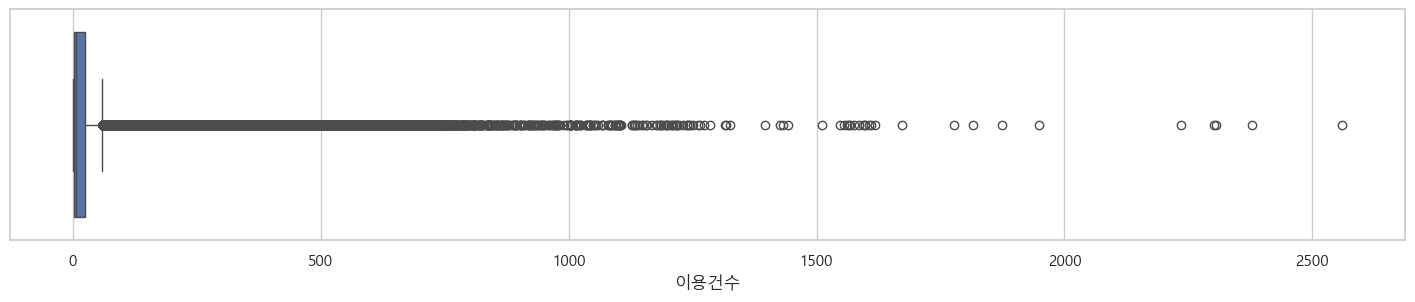

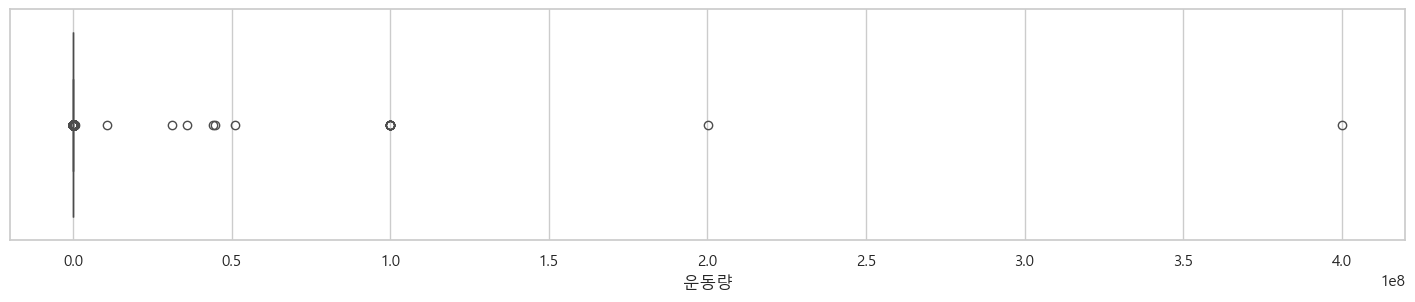

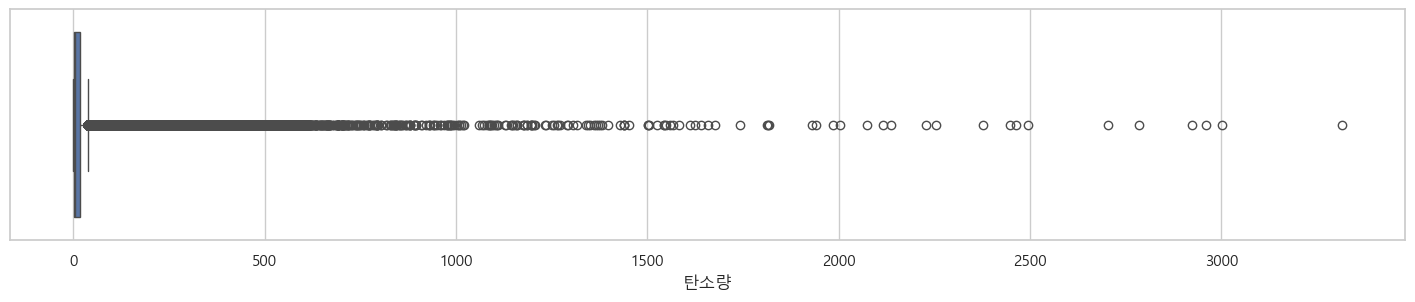

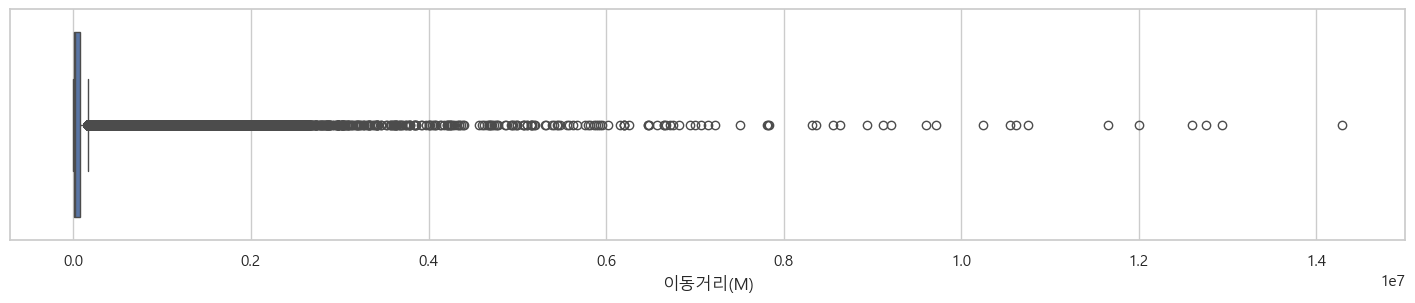

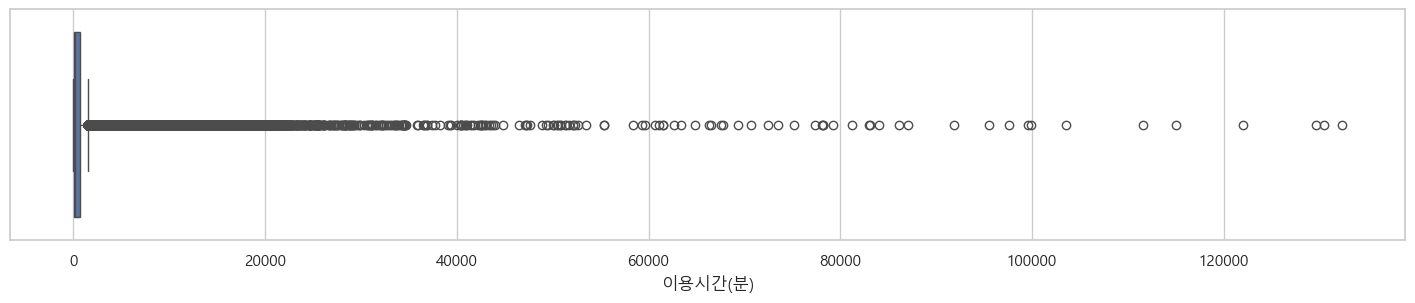

In [14]:
# 수치형 변수 분포 확인
# 히스토그램은 너무 오래걸려 Box Plot으로 빠르게 확인
for col in numerical_cols:
    plt.figure(figsize=(18, 3))  
    sns.boxplot(x=col, data=df)  
    plt.show() 

In [15]:
# 지수 표기법이 아닌 실제 수로 출력하도록 설정
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 통계치 확인
df_numeric = df[numerical_cols]
print(df_numeric.describe())

            이용건수          운동량        탄소량     이동거리(M)    이용시간(분)
count 1321616.00   1321616.00 1321616.00  1321616.00 1321616.00
mean       24.24      3094.75      15.73    67823.29     623.87
std        49.07    475590.99      34.92   150532.58    1326.31
min         1.00         0.00       0.00        0.00       0.00
25%         2.00       165.25       1.49     6439.49      68.00
50%         7.00       567.40       5.07    21854.76     214.00
75%        25.00      1822.68      16.08    69298.77     655.00
max      2559.00 400008918.69    3314.16 14285335.19  132301.00


### 전체적으로 이상치 제거가 필요하다고 판단함

In [16]:
# 이상치 제거
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
df_numeric = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_numeric.describe())

            이용건수        운동량        탄소량    이동거리(M)    이용시간(분)
count 1134399.00 1134399.00 1134399.00 1134399.00 1134399.00
mean       10.51     765.23       6.76   29154.73     277.96
std        12.05     876.84       7.67   33047.56     304.35
min         1.00       0.00       0.00       0.00       0.00
25%         2.00     132.78       1.20    5180.69      56.00
50%         5.00     411.83       3.69   15914.10     157.00
75%        15.00    1088.25       9.67   41662.30     399.00
max        59.00    4308.73      37.96  163587.13    1535.00


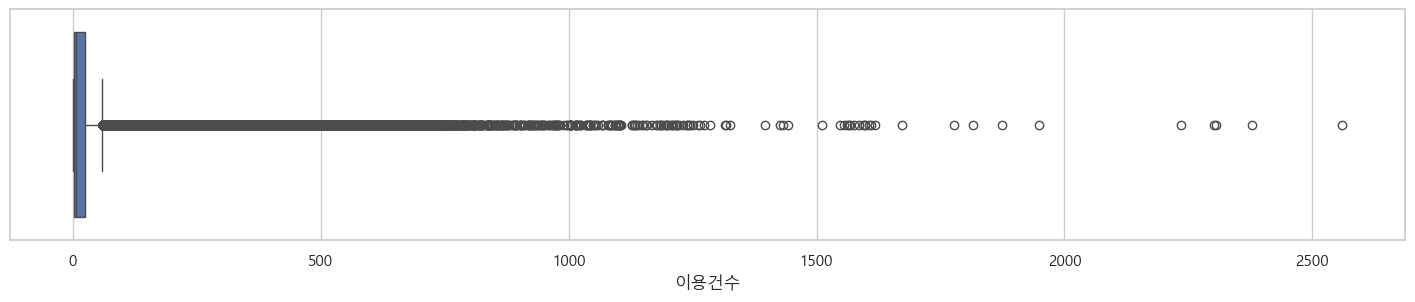

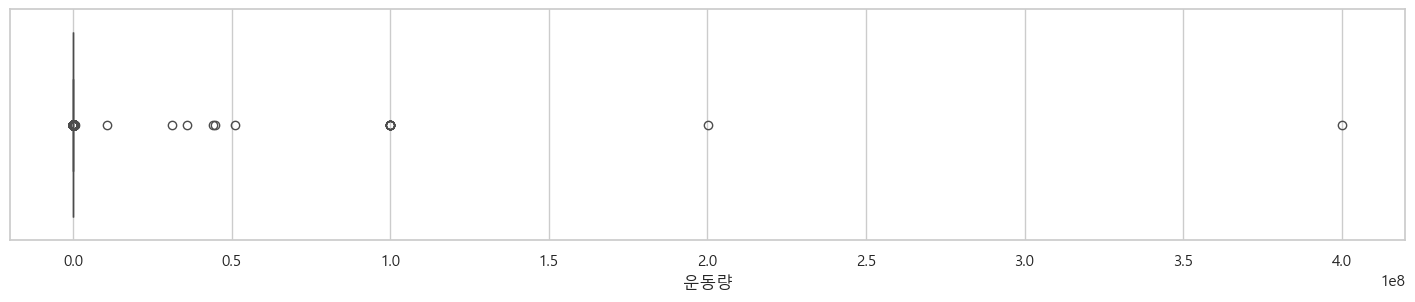

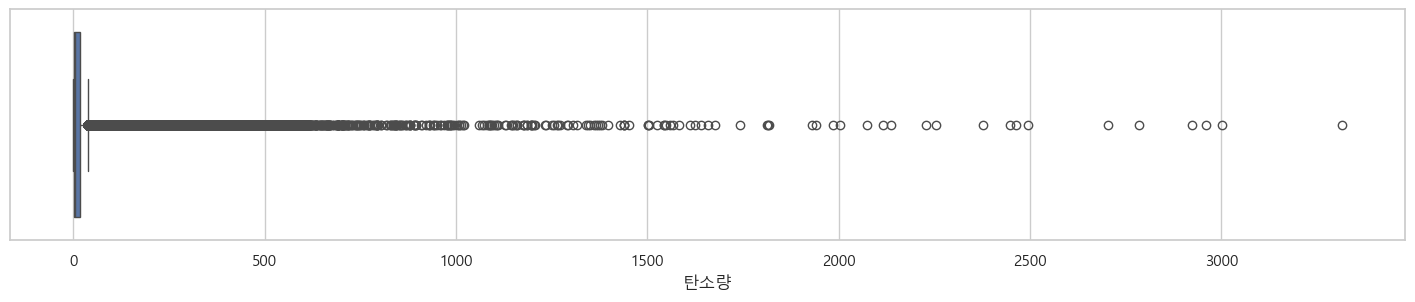

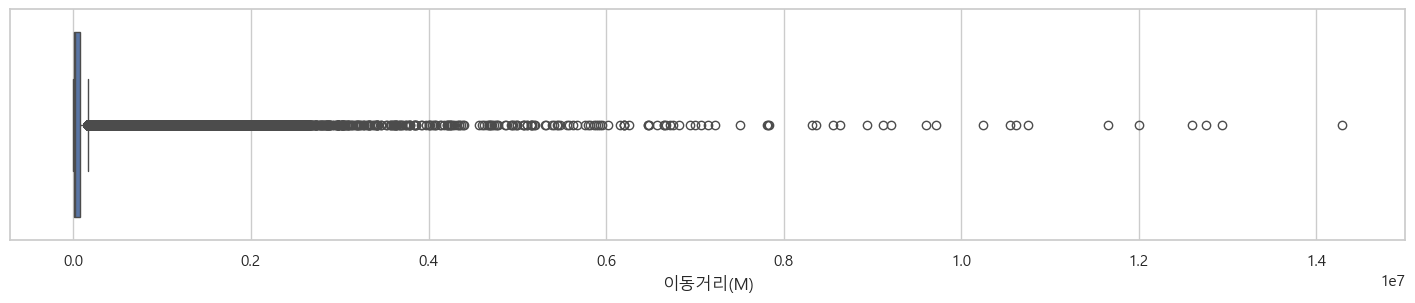

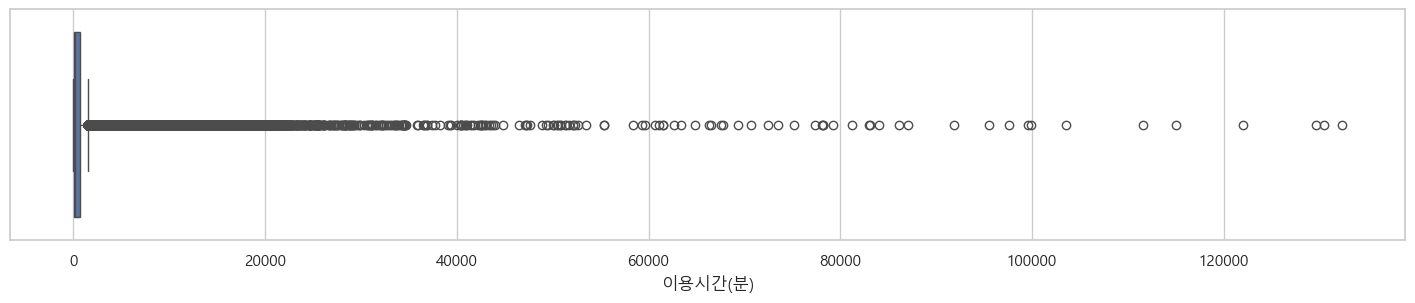

In [17]:
# 이상치 제거 후 Box Plot
for col in numerical_cols:
    plt.figure(figsize=(18, 3)) 
    sns.boxplot(x=col, data=df)  
    plt.show() 

### 상관 분석

c:\JH Files\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\njh26\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


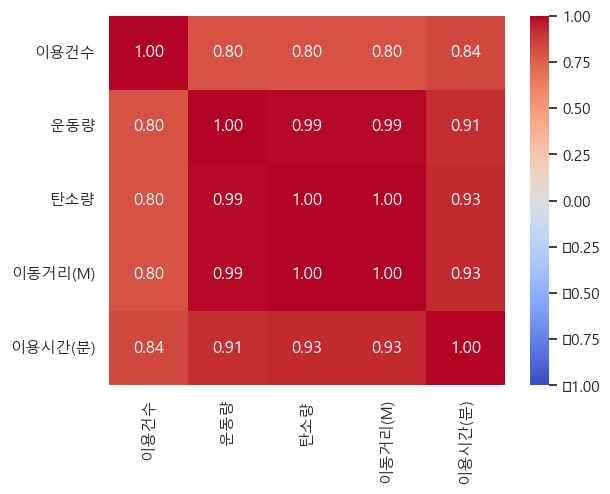

In [18]:
# Heatmap
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', vmin = -1, vmax = 1, annot=True, fmt='.2f')
plt.show()

### 파생 변수 생성(대여월, 대여요일)

### 범주형 변수 분포 확인

In [19]:
categorical_cols = ['대여소번호', '대여소명', '대여구분코드', '성별', '연령대코드']

In [20]:
# 범주 개수 확인
print('각 범주의 종류 개수는 다음과 같습니다')
for col in categorical_cols:
    print(col, ':', df[col].nunique())

각 범주의 종류 개수는 다음과 같습니다
대여소번호 : 2652
대여소명 : 2695
대여구분코드 : 5
성별 : 2
연령대코드 : 8


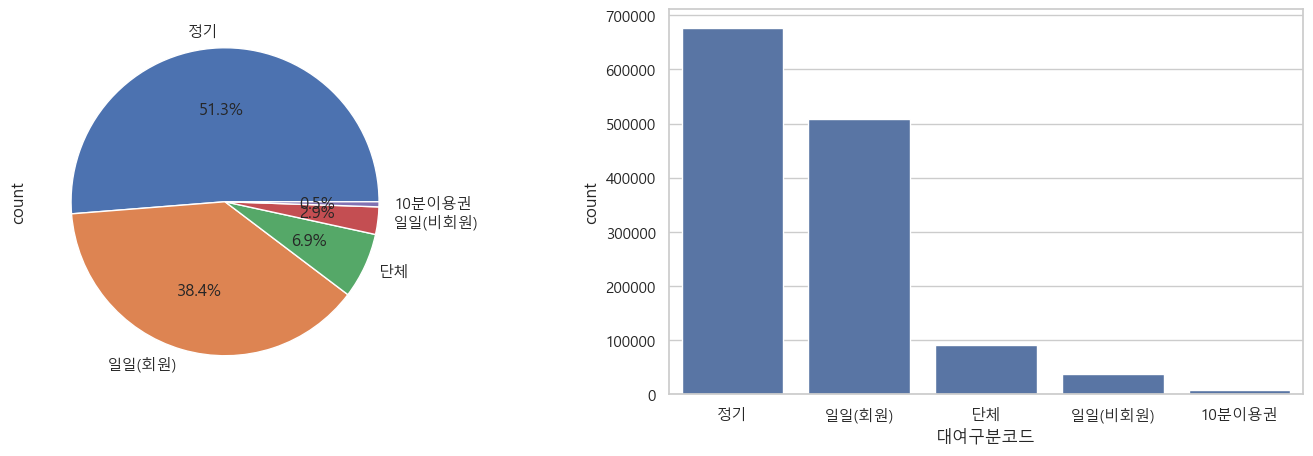

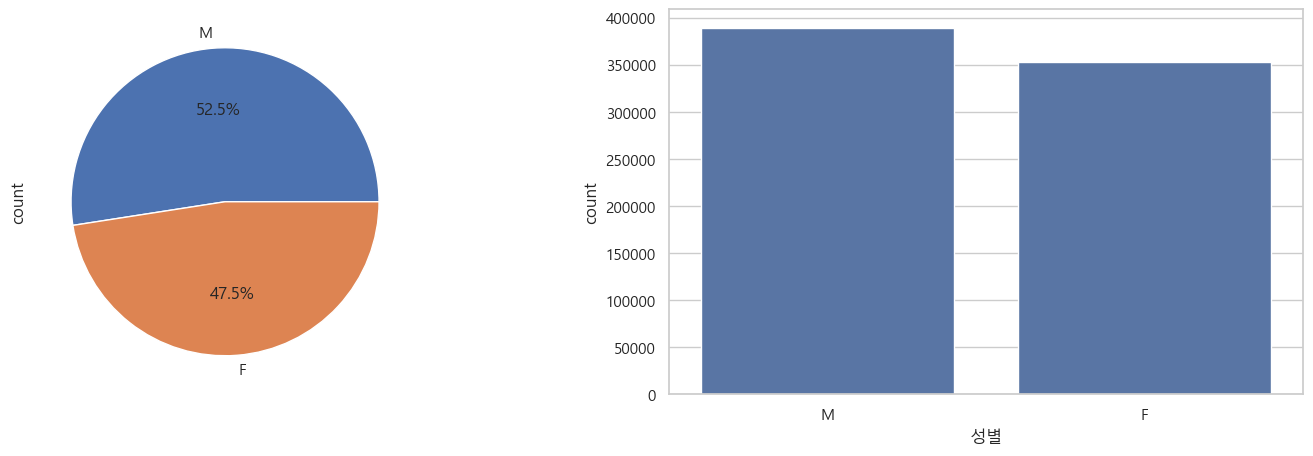

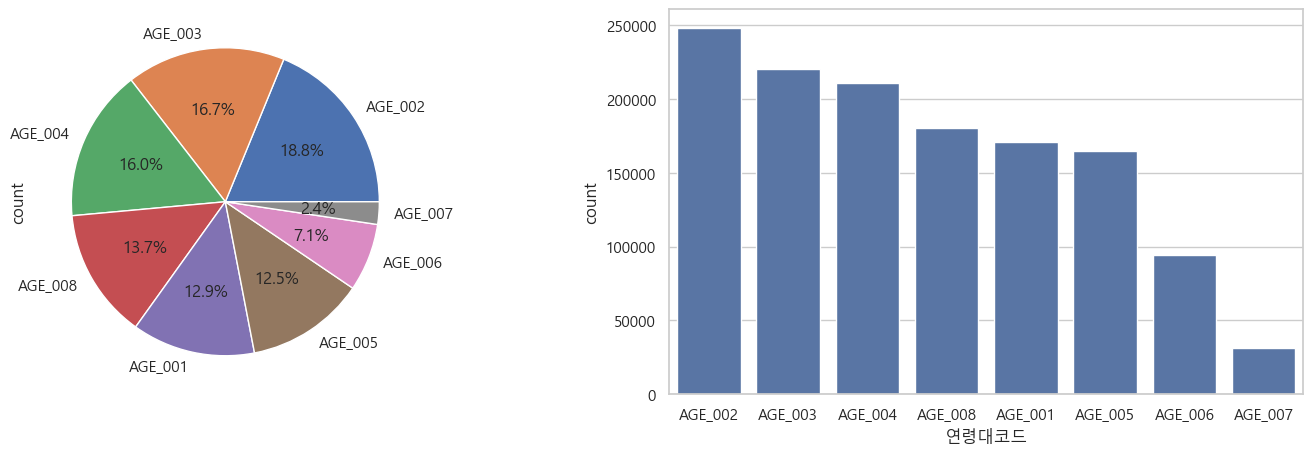

In [21]:
# Pie Chart, Count Plot
max_number_of_cat = 15   # 최대 범주 개수 설정
for col in categorical_cols:
    if df[col].nunique() < max_number_of_cat:   # 범주가 너무 많은 경우 제외 : 대여소번호, 대여소명
        plt.figure(figsize = (18,5))
        plt.subplot(1,2,1)
        df[f'{col}'].value_counts().plot.pie(autopct='%1.1f%%')
        
        plt.subplot(1,2,2)
        sns.countplot(x = col, data = df, order = df[col].value_counts().index)
        plt.show()

### 정기, 일일(회원), 단체 이용이 90%를 넘음 -> 자주 이용하는 고객만 이용하는 편으로 보임
### 성별 비율은 비슷하며 비교적 젊은 층인 20대,30대,40대가 주로 이용함
### 60대, 70대에 반해 80대의 이용비율이 높은 점에 대해서 확인이 필요함

### 대여날짜별 이용횟수

In [22]:
df['대여일자'] = pd.to_datetime(df['대여일자'])  # datetime 타입으로 변경
df['대여월'] = df['대여일자'].dt.month.astype('object')
df['대여요일'] = df['대여일자'].dt.strftime('%a')

print(df.head(3))

        대여일자 대여소번호  대여소명  대여구분코드 성별    연령대코드  이용건수    운동량  탄소량  이동거리(M)  \
0 2021-01-01     3  중랑센터  일일(회원)  M  AGE_003     2  47.68 0.40  1720.00   
1 2021-01-01     3  중랑센터      정기  M  AGE_003    11 578.98 2.87 12390.48   
2 2021-01-01     3  중랑센터      정기  M  AGE_004     1  81.65 0.53  2291.05   

   이용시간(분) 대여월 대여요일  
0       25   1  Fri  
1      166   1  Fri  
2       13   1  Fri  


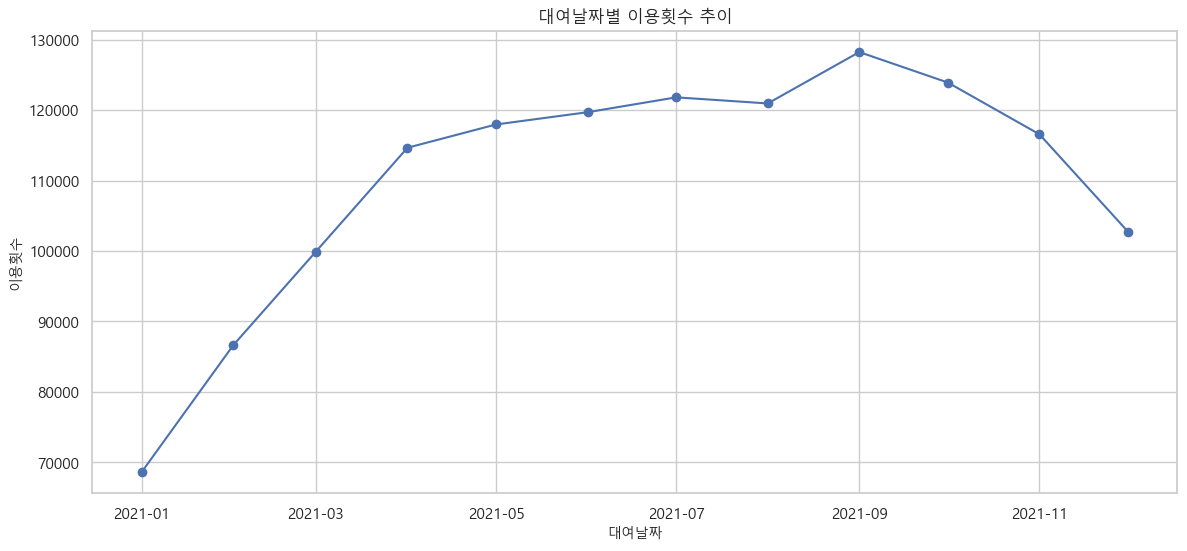

In [23]:
# 날짜별 이용횟수를 계산
usage_counts = df.groupby(df['대여일자'].dt.date).size()

# 이용날짜별 이용횟수 추이 시각화
plt.figure(figsize=(14, 6))
plt.plot(usage_counts.index, usage_counts.values, marker='o', linestyle='-')
plt.title('대여날짜별 이용횟수 추이', fontsize=12)
plt.xlabel('대여날짜', fontsize=10)
plt.ylabel('이용횟수', fontsize=10)
plt.show()

대여요일
Mon    303080
Thu    236461
Wed    230963
Fri    192513
Sun    120942
Tue    119698
Sat    117959
Name: count, dtype: int64


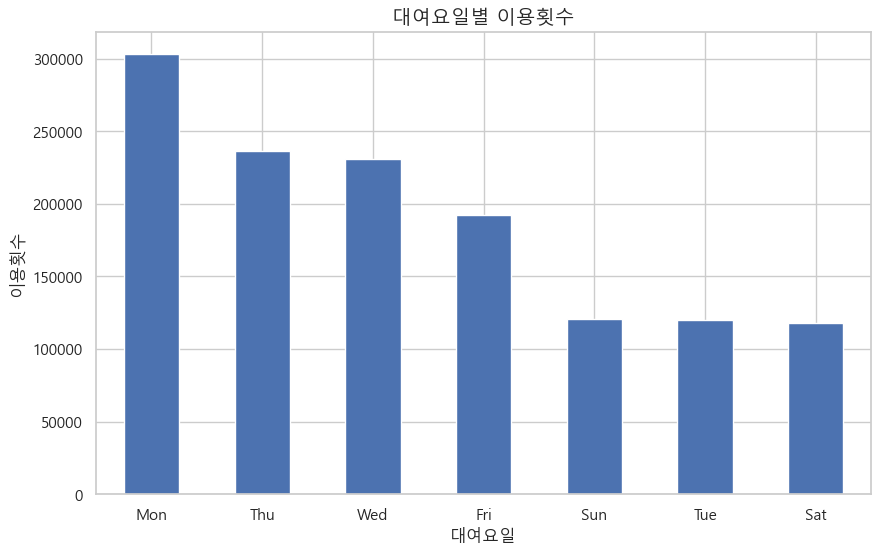

In [24]:
#요일별 통계
usage_counts = df['대여요일'].value_counts()
print(usage_counts)

plt.figure(figsize=(10, 6))
usage_counts.plot(kind='bar')
plt.title('대여요일별 이용횟수', fontsize=14)
plt.ylabel('이용횟수', fontsize=12)
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

### 1,2 월 이용이 적음 -> 날씨가 추운 탓에 자전거 이용이 적기 때문으로 추정
### 월수목금 이용이 많음 -> 주로 평일에 활용하는 것으로 보임